## Detection of Phishing attack using Machine Learning Approach

### IMPORT STATEMENTS

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import folium
from sklearn.preprocessing import OneHotEncoder
from folium.plugins import MarkerCluster
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [3]:
df =  pd.read_csv('security.csv')

In [4]:
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CACHE_CONTROL,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATE_CITY,WHOIS_REG_YEAR,...,REMOTE_IPS,APP_BYTES,UDP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,TIPO
0,B0_113,17,6,ISO-8859-1,nginx,None,162,US,California,1997,...,3,3812,0,39,37,18784,4380,39,8,Benigna
1,B0_403,17,6,UTF-8,Apache/2.2.0 (Fedora),"max-age=269, must-revalidate",124140,US,Texas,1996,...,5,4278,0,61,62,129889,4586,61,4,Benigna
2,B0_2064,18,7,UTF-8,nginx,None,11260,CN,Shanxi,2017,...,9,894,0,11,13,838,894,11,0,Benigna
3,B0_462,18,6,iso-8859-1,Apache/2,None,345,US,Colorado,2002,...,3,1189,0,14,13,8559,1327,14,2,Benigna
4,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,None,324,US,Florida,1997,...,0,0,0,0,0,0,0,0,0,Benigna


In [5]:
df[0:1].T

,0
URL,B0_113
URL_LENGTH,17
NUMBER_SPECIAL_CHARACTERS,6
CHARSET,ISO-8859-1
SERVER,nginx
CACHE_CONTROL,None
CONTENT_LENGTH,162
WHOIS_COUNTRY,US
WHOIS_STATE_CITY,California
WHOIS_REG_YEAR,1997


In [6]:
df.nunique()

URL                          1611
URL_LENGTH                    140
NUMBER_SPECIAL_CHARACTERS      30
CHARSET                         9
SERVER                        118
CACHE_CONTROL                 142
CONTENT_LENGTH                567
WHOIS_COUNTRY                  43
WHOIS_STATE_CITY              160
WHOIS_REG_YEAR                 27
UPDATE_YEAR                     9
DOMAIN_NAME                   933
TCP_CONVERSATION_EXCHANGE      99
DIST_REMOTE_TCP_PORT           65
REMOTE_IPS                     17
APP_BYTES                     734
UDP_PACKETS                     1
SOURCE_APP_PACKETS            107
REMOTE_APP_PACKETS            107
SOURCE_APP_BYTES              782
REMOTE_APP_BYTES              728
APP_PACKETS                   107
DNS_QUERY_TIMES                 9
TIPO                            2
dtype: int64

In [17]:
df['URL'].isna().sum() 

0

In [18]:
df['SERVER'].isna().sum() 

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 24 columns):
URL                          1611 non-null object
URL_LENGTH                   1611 non-null int64
NUMBER_SPECIAL_CHARACTERS    1611 non-null int64
CHARSET                      1611 non-null object
SERVER                       1611 non-null object
CACHE_CONTROL                1611 non-null object
CONTENT_LENGTH               1611 non-null int64
WHOIS_COUNTRY                1611 non-null object
WHOIS_STATE_CITY             1611 non-null object
WHOIS_REG_YEAR               1611 non-null int64
UPDATE_YEAR                  1611 non-null int64
DOMAIN_NAME                  1611 non-null object
TCP_CONVERSATION_EXCHANGE    1611 non-null int64
DIST_REMOTE_TCP_PORT         1611 non-null int64
REMOTE_IPS                   1611 non-null int64
APP_BYTES                    1611 non-null int64
UDP_PACKETS                  1611 non-null int64
SOURCE_APP_PACKETS           1611 non-null int64
REMO

In [20]:
df['SERVER'].unique()

array(['nginx', 'Apache/2.2.0 (Fedora)', 'Apache/2',
       'Microsoft-HTTPAPI/2.0', 'Apache', 'Apache/2.4.23',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0', 'Apache/2.4.12 (Unix) ', 'nginx/1.10.0 (Ubuntu)',
       'cloudflare-nginx', 'openresty', 'Heptu web server',
       'Pepyaka/1.11.3', 'nginx/1.8.0', 'nginx/1.10.1',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.2.22 (Debian)', 'Apache/2.4.23 (Unix) ',
       'Apache/2.4.25 (cPanel) ', 'tsa_a', 'Apache/2.2.15 (CentOS)',
       'Apache/2.4.25', 'Apache/2.4.25 (Amazon) ', 'GSE', 'AmazonS3',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.2.29 (Unix)', 'Tengine', 'Apache/2.4.18 (Unix) ',
       'Apache/2.4.10 (Debian)', 'Apache/2.4.6 (CentOS) ',
       'Sun-ONE-Web-Server/6.1', 'Apache/1.3.37 (Unix)', 'ATS',
       'CherryPy/3.6.0', 'Server', 'Apache/2.2.3 (CentOS)', 'Apache/2.4',
       'nginx/1.10.1 ', 'Apache/1.3.27 (

In [7]:
df = df.rename(columns={'WHOIS_REG_YEAR': 'YEAR', 'WHOIS_STATE_CITY': 'CITY', 'WHOIS_COUNTRY': 'COUNTRY','TIPO' : 'TYPE' })
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CACHE_CONTROL,CONTENT_LENGTH,COUNTRY,CITY,YEAR,...,REMOTE_IPS,APP_BYTES,UDP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,TYPE
0,B0_113,17,6,ISO-8859-1,nginx,None,162,US,California,1997,...,3,3812,0,39,37,18784,4380,39,8,Benigna
1,B0_403,17,6,UTF-8,Apache/2.2.0 (Fedora),"max-age=269, must-revalidate",124140,US,Texas,1996,...,5,4278,0,61,62,129889,4586,61,4,Benigna
2,B0_2064,18,7,UTF-8,nginx,None,11260,CN,Shanxi,2017,...,9,894,0,11,13,838,894,11,0,Benigna
3,B0_462,18,6,iso-8859-1,Apache/2,None,345,US,Colorado,2002,...,3,1189,0,14,13,8559,1327,14,2,Benigna
4,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,None,324,US,Florida,1997,...,0,0,0,0,0,0,0,0,0,Benigna


## DATA VISULAIZATION

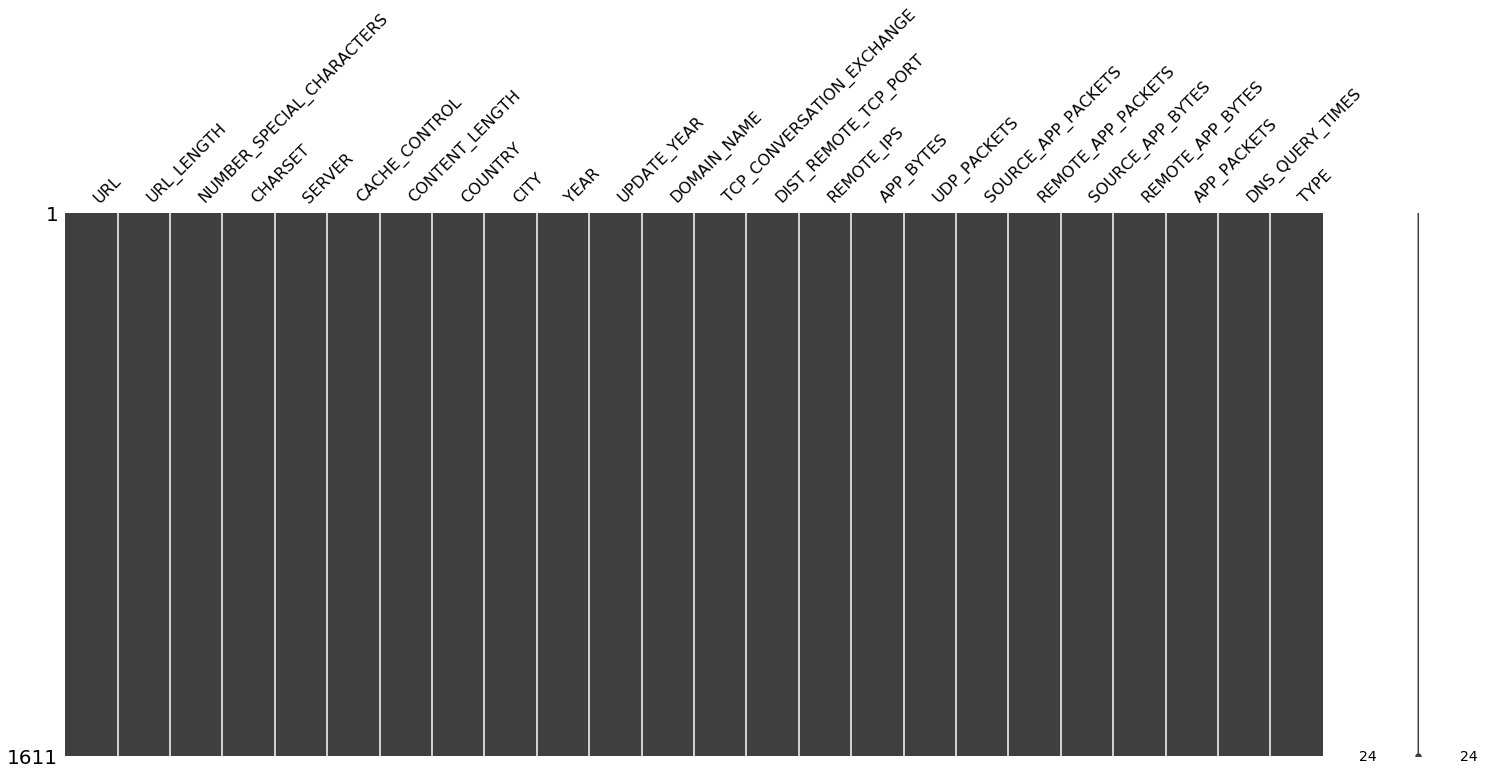

In [22]:
#to find the missing value
## TO INSTALL MISSINGNO, PLEASE INSTALL IT USING "!pip install missingno"
import missingno as msno
msno.matrix(df)

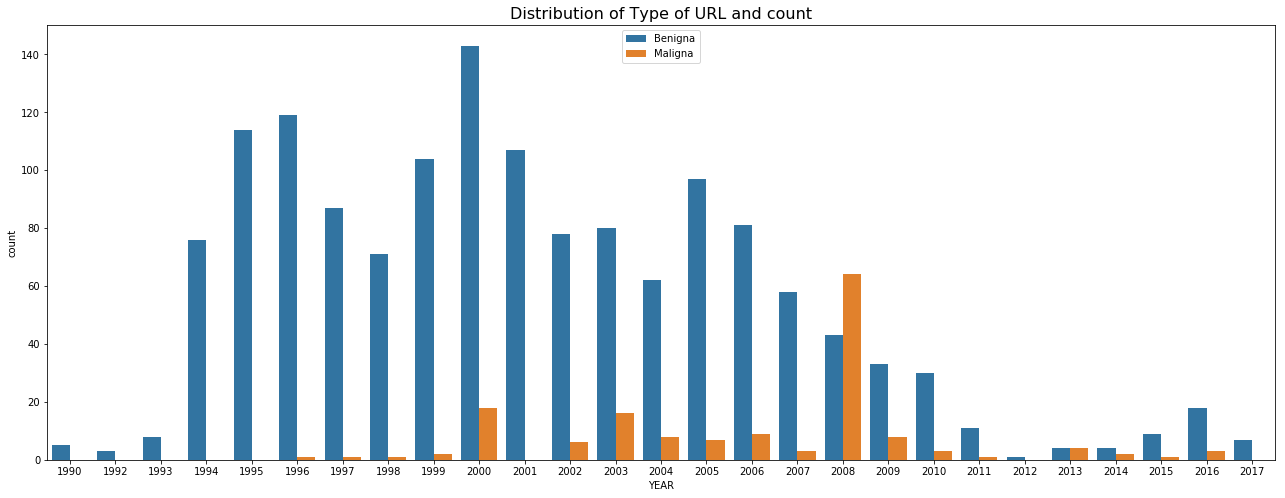

In [23]:
# plotting the count of Malicious and Benign URL across the years 
plt.figure(figsize=(22,8))
sns.countplot(data=df, x='YEAR', hue='TYPE')
plt.title("Distribution of Type of URL and count",size=16)
plt.legend()

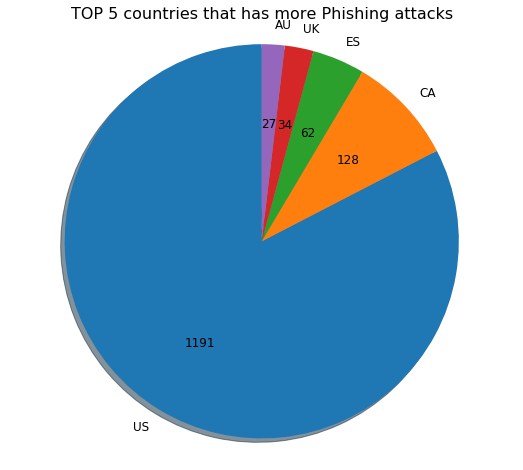

In [44]:
# Top 5 Origin of attacks 
country = df['COUNTRY'].value_counts()
country=country[:5,]
labels = country.index
sizes = country.values
total=sum(sizes)
plt.title('TOP 5 countries that has more Phishing attacks', size = 16)
plt.pie(sizes, labels=labels,autopct=lambda p:'{:.0f}'.format(p * total / 100), shadow=True, startangle=90,textprops={'fontsize': 12})
fig = plt.gcf()
fig.set_size_inches(9,8) 
plt.axis('equal')
plt.show()

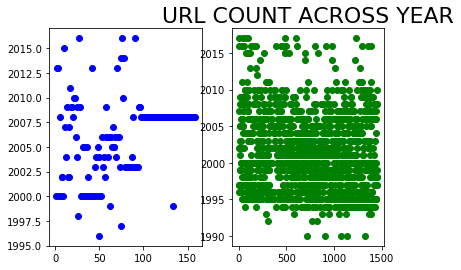

In [49]:
##SCATTER PLOT OF FRAUDULENT AND NORMAL URL  across the years
color = {1:'blue', 0:'green'}
fraudulent = df[df.TYPE == 1]
regular = df[df.TYPE == 0]
fig,axes = plt.subplots(1,2)
plt.title("URL COUNT ACROSS YEAR", size = 22)
axes[0].scatter(list(range(1,fraudulent.shape[0] + 1)), fraudulent.YEAR,color='blue')

axes[1].scatter(list(range(1, regular.shape[0] + 1)), regular.YEAR,color='green')
plt.show()

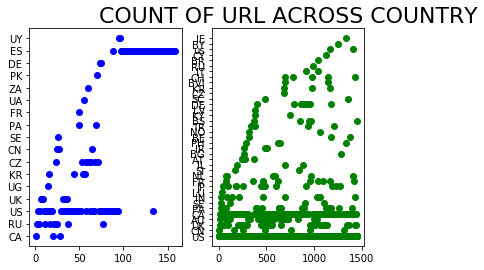

In [48]:
##SCATTER PLOT OF FRAUDULENT AND NORMAL url acorss the countries
color = {1:'blue', 0:'green'}
fraudulent = df[df.TYPE == 1]
regular = df[df.TYPE == 0]

fig,axes = plt.subplots(1,2)
plt.title("COUNT OF URL ACROSS COUNTRY", size = 22)
axes[0].scatter(list(range(1,fraudulent.shape[0] + 1)), fraudulent.COUNTRY,color='blue')

axes[1].scatter(list(range(1, regular.shape[0] + 1)), regular.COUNTRY,color='green')
plt.show()

C:\Users\Revathy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


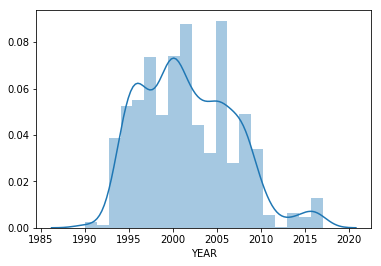

In [27]:
# indicating the crime rate over the years
sns.distplot(df.YEAR)

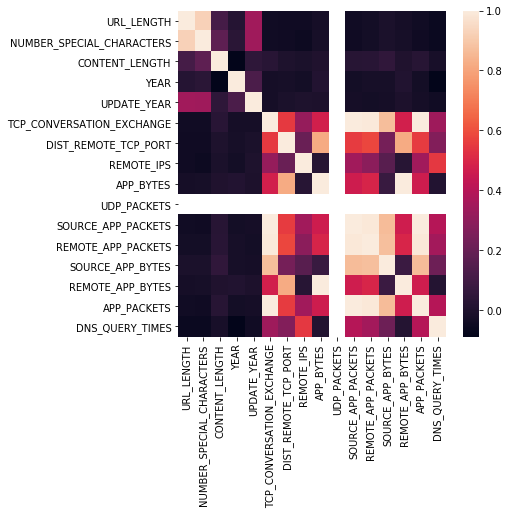

In [28]:
## correlation matrix
corr = df.corr()
plt.figure(figsize=(6,6))

# Heatmap - plotting the correlation matrix
sns.heatmap(corr)

## DATA PREPROCESSING

In [8]:
df1 = pd.get_dummies(df, columns=['URL','DOMAIN_NAME','CHARSET', 'SERVER', 'CACHE_CONTROL','COUNTRY','CITY'])

In [9]:
df1.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,YEAR,UPDATE_YEAR,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,UDP_PACKETS,...,CITY_Worcs,CITY_Wyoming,CITY_Zollikon,CITY_Zug,CITY_Zurich,CITY_kireka,CITY_liaoningsheng,CITY_shandong,CITY_widestep@mail.ru,CITY_wisconsin
0,17,6,162,1997,2013,31,22,3,3812,0,...,0,0,0,0,0,0,0,0,0,0
1,17,6,124140,1996,2017,57,2,5,4278,0,...,0,0,0,0,0,0,0,0,0,0
2,18,7,11260,2017,2017,11,6,9,894,0,...,0,0,0,0,0,0,0,0,0,0
3,18,6,345,2002,2016,12,0,3,1189,0,...,0,0,0,0,0,0,0,0,0,0
4,19,6,324,1997,2017,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = df1.drop(axis=1, columns=['TYPE'])

In [11]:
X.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,YEAR,UPDATE_YEAR,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,UDP_PACKETS,...,CITY_Worcs,CITY_Wyoming,CITY_Zollikon,CITY_Zug,CITY_Zurich,CITY_kireka,CITY_liaoningsheng,CITY_shandong,CITY_widestep@mail.ru,CITY_wisconsin
0,17,6,162,1997,2013,31,22,3,3812,0,...,0,0,0,0,0,0,0,0,0,0
1,17,6,124140,1996,2017,57,2,5,4278,0,...,0,0,0,0,0,0,0,0,0,0
2,18,7,11260,2017,2017,11,6,9,894,0,...,0,0,0,0,0,0,0,0,0,0
3,18,6,345,2002,2016,12,0,3,1189,0,...,0,0,0,0,0,0,0,0,0,0
4,19,6,324,1997,2017,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
def target(type):
    if type == "Benigna":
        return 0
    else:
        return 1

In [13]:
df['TYPE'] = df['TYPE'].apply(target)

In [14]:
df['TYPE'].head()

0    0
1    0
2    0
3    0
4    0
Name: TYPE, dtype: int64

In [15]:
y = df['TYPE']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: TYPE, dtype: int64

### DEFINING THE TRAINING AND TEST MODEL

In [16]:
test_size = 0.25
seed = 100

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=seed)

## DATA PROCESSING

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1)
model.fit(X_train, y_train)

C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
logreg_pred=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(logreg_pred,y_test))
log_acc = metrics.accuracy_score(logreg_pred,y_test)

Accuracy: 0.9454094292803971


In [20]:
from sklearn.model_selection import learning_curve, GridSearchCV, cross_val_score, KFold

In [21]:
import warnings
param = {'C': np.logspace(-1, 2, 4),'penalty':['l1','l2']}

clf = GridSearchCV(model, param, n_jobs = -1)
clf.fit(X_train, y_train)

C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([  0.1,   1. ,  10. , 100. ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
def getAccuracy(clf, train, target):
    print("best score: ", clf.best_score_)
    print("best parameters: ", clf.best_params_)
    predict = clf.best_estimator_.predict(train)
    print(metrics.classification_report(target,predict))
    print(metrics.confusion_matrix(target, predict))
    print(cross_val_score(clf.best_estimator_, train, target, cv= 5).mean())
getAccuracy(clf, X_train, y_train)
getAccuracy(clf, X_test, y_test)

best score:  0.9660596026490066
best parameters:  {'C': 100.0, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1091
           1       1.00      1.00      1.00       117

   micro avg       1.00      1.00      1.00      1208
   macro avg       1.00      1.00      1.00      1208
weighted avg       1.00      1.00      1.00      1208

[[1091    0]
 [   0  117]]


C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

0.9677168742343311
best score:  0.9660596026490066
best parameters:  {'C': 100.0, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       362
           1       0.97      0.71      0.82        41

   micro avg       0.97      0.97      0.97       403
   macro avg       0.97      0.85      0.90       403
weighted avg       0.97      0.97      0.97       403

[[361   1]
 [ 12  29]]


C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.955183679614574


C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Revathy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# LOGISTIC REGRESSION CONFUSION MATRIX 

In [29]:
matrix = confusion_matrix(y_test, logreg_pred)
matrix

array([[357,   5],
       [ 17,  24]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
report1 = classification_report(y_test, logreg_pred)

In [31]:
print(report1)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       362
           1       0.83      0.59      0.69        41

   micro avg       0.95      0.95      0.95       403
   macro avg       0.89      0.79      0.83       403
weighted avg       0.94      0.95      0.94       403



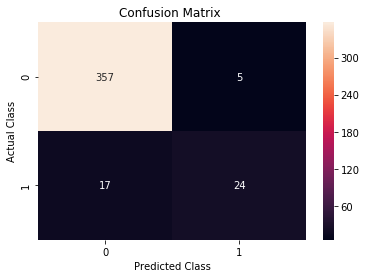

In [32]:
# Plot confusion Matrix with Labels

plt.title('Confusion Matrix ')
sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
plt.xlabel('Predicted Class')
# Set y-axis label
plt.ylabel('Actual Class')
#print(str(c_mat))
plt.show()

## CROSS VALIDATION - Finding MSE & R2 value for Logistic regerssion

In [23]:
import pandas as pd
from sklearn import model_selection

import warnings
warnings.filterwarnings('ignore')

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

print( "Mean = ", results.mean())
print("Standard Deviation = ", results.std())

Mean =  0.5333358144633278
Standard Deviation =  0.23058685118416136


In [24]:
##Mean Square Error
a = np.sqrt(np.mean((logreg_pred-y_test)**2))

In [25]:
a

0.23364625124234922

## K Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#learning
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
#KNN Accuracy Prediction
KNN_pred2=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(KNN_pred2,y_test))
KNN_acc = metrics.accuracy_score

Accuracy: 0.9503722084367245


## K NEAREST NEIGHBOUR CONFUSION MATRIX 

In [36]:
matrix = confusion_matrix(y_test, KNN_pred2)
matrix

array([[356,   6],
       [ 14,  27]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report

In [38]:
report1 = classification_report(y_test, KNN_pred2)

In [39]:
print(report1)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       362
           1       0.82      0.66      0.73        41

   micro avg       0.95      0.95      0.95       403
   macro avg       0.89      0.82      0.85       403
weighted avg       0.95      0.95      0.95       403



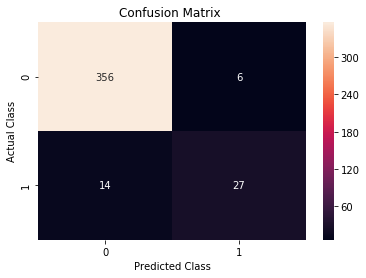

In [40]:
# Plot with Labels

plt.title('Confusion Matrix ')

sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
plt.xlabel('Predicted Class')
# Set y-axis label
plt.ylabel('Actual Class')
plt.show()

## MSE & R2 value for K Nearest Neighbors

In [28]:
import pandas
from sklearn import model_selection
#from sklearn.linear_model import KNeighborsClassifier

seed = 2
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = KNeighborsClassifier()
scoring = 'r2'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print( "Mean = ", results.mean())
print("Standard Deviation = ", results.std())

Mean =  0.404155194743219
Standard Deviation =  0.18963885625786542


In [29]:
##Mean Square Error
a2 = np.sqrt(np.mean((KNN_pred2-y_test)**2))
a2

0.2227729596770565

## Gradient Boosting Classifier

In [30]:
gbc = GradientBoostingClassifier(n_estimators=750,learning_rate=0.3)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=750,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [31]:
gbc_pred1=gbc.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(gbc_pred1,y_test))
gbc_acc = metrics.accuracy_score

Accuracy: 0.9751861042183623


## GRADIENT BOOSTING CONFUSION MATRIX 

In [45]:
matrix = confusion_matrix(y_test, gbc_pred1)

In [46]:
matrix

array([[362,   0],
       [ 10,  31]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report

In [49]:
report1 = classification_report(y_test, gbc_pred1)

In [50]:
print(report1)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       362
           1       1.00      0.76      0.86        41

   micro avg       0.98      0.98      0.98       403
   macro avg       0.99      0.88      0.92       403
weighted avg       0.98      0.98      0.97       403



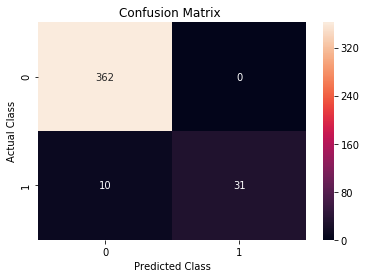

In [51]:
# Plot with Labels

plt.title('Confusion Matrix ')
sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
plt.xlabel('Predicted Class')
# Set y-axis label
plt.ylabel('Actual Class')
plt.show()

## Cross Validation - Finding MSE & R2 value for Gradient Boosting

In [32]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier()
scoring = 'r2'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print( "Mean = ", results.mean())
print("Standard Deviation = ", results.std())

Mean =  0.6310073143895005
Standard Deviation =  0.135157296968838


In [33]:
##Mean Square Error
a3 = np.sqrt(np.mean((gbc_pred1-y_test)**2))
a3

0.15752427045264397

## CART 

In [34]:
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier(random_state=123)
#learning
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [35]:
#Prediction
CART_pred3=model.predict(X_test)
#importing the metrics module
print("Accuracy:",metrics.accuracy_score(CART_pred3,y_test))
cart_acc = metrics.accuracy_score

Accuracy: 0.9702233250620348


# CART CONFUSION MATRIX 

In [78]:
matrix = confusion_matrix(y_test, CART_pred3)

In [80]:
matrix

array([[361,   1],
       [ 11,  30]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report

In [82]:
report1 = classification_report(y_test, CART_pred3)

In [83]:
print(report1)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       362
           1       0.97      0.73      0.83        41

   micro avg       0.97      0.97      0.97       403
   macro avg       0.97      0.86      0.91       403
weighted avg       0.97      0.97      0.97       403



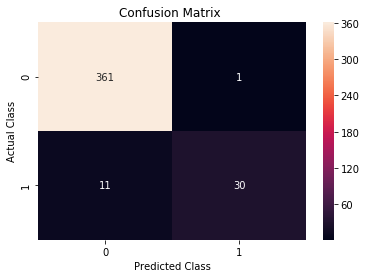

In [84]:
# Plot with Labels

plt.title('Confusion Matrix ')

sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
plt.xlabel('Predicted Class')
# Set y-axis label
plt.ylabel('Actual Class')
plt.show()

## Cross Validation - Finding MSE & R2 value for CART

In [85]:
import pandas
from sklearn import model_selection
#from sklearn.linear_model import DecisionTreeClassifier

seed = 2
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = DecisionTreeClassifier()
scoring = 'r2'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print( "Mean = ", results.mean())
print("Standard Deviation = ", results.std())

Mean =  0.5469934993710126
Standard Deviation =  0.1660610666142681


In [86]:
##Mean Square Error
a1 = np.sqrt(np.mean((CART_pred3-y_test)**2))

In [87]:
a1

0.17255919256291524

## MLP Classifier

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
predictions = mlp.predict(X_test)
print("Accuracy:",metrics.accuracy_score(predictions,y_test))

Accuracy: 0.8957816377171216


In [96]:
from sklearn.metrics import classification_report

In [97]:
report_mlp = classification_report(y_test, predictions)

In [98]:
print(report_mlp)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       362
           1       0.20      0.10      0.13        41

   micro avg       0.87      0.87      0.87       403
   macro avg       0.55      0.53      0.53       403
weighted avg       0.83      0.87      0.85       403



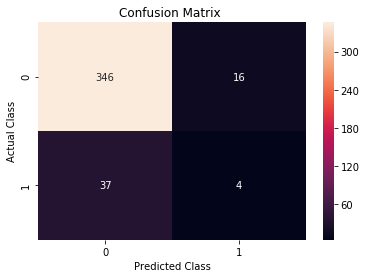

In [99]:
# Plot with Labels
from sklearn.metrics import accuracy_score, confusion_matrix
matrix = confusion_matrix(y_test, predictions)
plt.title('Confusion Matrix ')

sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
plt.xlabel('Predicted Class')
# Set y-axis label
plt.ylabel('Actual Class')
plt.show()

## Cross Validation - Finding MSE and R square value for MLP

In [39]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 4
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = MLPClassifier()
scoring = 'r2'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print( "Mean = ", results.mean())
print("Standard Deviation = ", results.std())

Mean =  -0.6398313018553609
Standard Deviation =  1.3183213668689122


In [40]:
##Mean Square Error
a3 = np.sqrt(np.mean((predictions-y_test)**2))
a3

0.32282868875438936

## PERFORMANCE COMPARISION

In [41]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('Gradient', GradientBoostingClassifier())) 
models_list.append(('Logistic',  LogisticRegression()))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('MLP', MLPClassifier()))

In [42]:
import warnings
warnings.filterwarnings('ignore')

## PERFORMANCE COMPARISION & K FOLD CROSS VALIDATION

In [43]:
num_folds = 5
results = []
names = []


for name, model in models_list:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = 'Model %s - Mean : %f ,STD: %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)

Model CART - Mean : 0.840997 ,STD: 0.060099
Model Gradient - Mean : 0.974166 ,STD: 0.020703
Model Logistic - Mean : 0.953366 ,STD: 0.039882
Model KNN - Mean : 0.858150 ,STD: 0.095680
Model MLP - Mean : 0.798584 ,STD: 0.083490


### BOX PLOT SHOWING THE PERFORMANCE OF THE MODELS

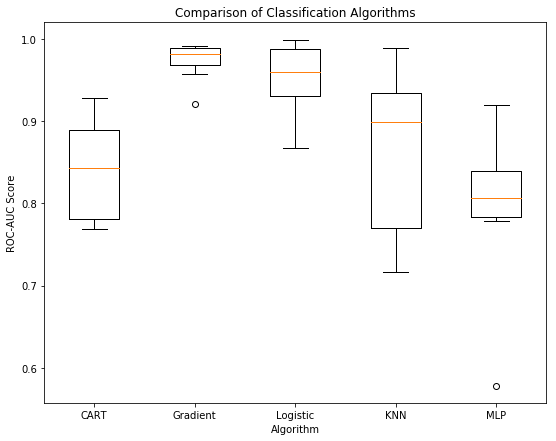

In [45]:
fig = plt.figure(figsize=(9,7))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()